In [1]:
#Import our dependencies.
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import codecs
file_path1 = codecs.open("clean_inbound_data_thousands.csv", "r", "ISO-8859-1")
file_path2 = codecs.open("clean_world_ind.csv", "r", "ISO-8859-1")

In [3]:
inbound_data_df = pd.read_csv(file_path1)
inbound_data_df.head()

,Unnamed: 0,Country,Year,Personal,Business,Total,Africa,Americas,East Asia and Pacific,Europe,Middle East,South Asia,Other not Classified
0,3,american samoa,1995,28.0,6.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,angola,1995,6.0,3.0,9.0,2.0,1.0,0.0,6.0,0.0,0.0,0.0
2,6,anguilla,1995,104.8,2.3,107.1,0.0,35.0,0.0,2.0,0.0,0.0,1.0
3,7,antigua and barbuda,1995,186.0,5.0,191.0,0.0,124.0,0.0,84.0,0.0,0.0,4.0
4,9,armenia,1995,10.0,2.0,12.0,0.0,2.0,0.0,8.0,0.0,1.0,0.0


In [4]:
inbound_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667 entries, 0 to 3666
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3667 non-null   int64  
 1   Country                3667 non-null   object 
 2   Year                   3667 non-null   int64  
 3   Personal               3667 non-null   float64
 4   Business               3667 non-null   float64
 5   Total                  3667 non-null   float64
 6   Africa                 3667 non-null   float64
 7   Americas               3667 non-null   float64
 8   East Asia and Pacific  3667 non-null   float64
 9   Europe                 3667 non-null   float64
 10  Middle East            3667 non-null   float64
 11  South Asia             3667 non-null   float64
 12  Other not Classified   3667 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 372.6+ KB


In [5]:
world_ind_df = pd.read_csv(file_path2)
world_ind_df.head()

,Unnamed: 0,Birth Rate,Country,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,...,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Region,Tourism Inbound,Tourism Outbound,Year,Header
0,0,0.020,algeria,5.479006e+10,0.035,60.0,0.034,0.0,71.0,67.0,...,0.342,0.619,0.039,31719449,0.599,Africa,102000000.0,193000000.0,2000,Data
1,1,0.050,angola,9.129595e+09,0.034,22.0,0.128,0.0,47.0,44.0,...,0.476,0.499,0.025,13924930,0.324,Africa,34000000.0,146000000.0,2000,Data
2,2,0.043,benin,2.359122e+09,0.043,15.0,0.090,0.0,57.0,53.0,...,0.454,0.517,0.029,6949366,0.383,Africa,77000000.0,50000000.0,2000,Data
3,3,0.027,botswana,5.788312e+09,0.047,152.0,0.054,0.0,52.0,49.0,...,0.383,0.587,0.029,1755375,0.532,Africa,227000000.0,209000000.0,2000,Data
4,4,0.046,burkina faso,2.610959e+09,0.051,12.0,0.096,0.0,52.0,49.0,...,0.468,0.505,0.028,11607944,0.178,Africa,23000000.0,30000000.0,2000,Data


In [6]:
world_ind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2704 non-null   int64  
 1   Birth Rate              2585 non-null   float64
 2   Country                 2704 non-null   object 
 3   GDP                     2494 non-null   float64
 4   Health Exp % GDP        2395 non-null   float64
 5   Health Exp/Capita       2395 non-null   float64
 6   Infant Mortality Rate   2444 non-null   float64
 7   Internet Usage          2531 non-null   float64
 8   Life Expectancy Female  2568 non-null   float64
 9   Life Expectancy Male    2568 non-null   float64
 10  Mobile Phone Usage      2537 non-null   float64
 11  Number of Records       2704 non-null   int64  
 12  Population 0-14         2484 non-null   float64
 13  Population 15-64        2484 non-null   float64
 14  Population 65+          2484 non-null   

In [7]:
#Drop Unnamed:0 Column.
inbound_data_df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [8]:
world_ind_df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [9]:
inbound_data_df.dtypes

Country                   object
Year                       int64
Personal                 float64
Business                 float64
Total                    float64
Africa                   float64
Americas                 float64
East Asia and Pacific    float64
Europe                   float64
Middle East              float64
South Asia               float64
Other not Classified     float64
dtype: object

In [10]:
world_ind_df.dtypes

Birth Rate                float64
Country                    object
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Infant Mortality Rate     float64
Internet Usage            float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Region                     object
Tourism Inbound           float64
Tourism Outbound          float64
Year                        int64
Header                     object
dtype: object

In [11]:
data_df = pd.merge(inbound_data_df, world_ind_df, on=["Country", "Year"], how="outer")
data_df.head()

,Country,Year,Personal,Business,Total,Africa,Americas,East Asia and Pacific,Europe,Middle East,...,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Region,Tourism Inbound,Tourism Outbound,Header
0,american samoa,1995,28.0,6.0,34.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,angola,1995,6.0,3.0,9.0,2.0,1.0,0.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,anguilla,1995,104.8,2.3,107.1,0.0,35.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,antigua and barbuda,1995,186.0,5.0,191.0,0.0,124.0,0.0,84.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,armenia,1995,10.0,2.0,12.0,0.0,2.0,0.0,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4780 entries, 0 to 4779
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 4780 non-null   object 
 1   Year                    4780 non-null   int64  
 2   Personal                3667 non-null   float64
 3   Business                3667 non-null   float64
 4   Total                   3667 non-null   float64
 5   Africa                  3667 non-null   float64
 6   Americas                3667 non-null   float64
 7   East Asia and Pacific   3667 non-null   float64
 8   Europe                  3667 non-null   float64
 9   Middle East             3667 non-null   float64
 10  South Asia              3667 non-null   float64
 11  Other not Classified    3667 non-null   float64
 12  Birth Rate              2585 non-null   float64
 13  GDP                     2494 non-null   float64
 14  Health Exp % GDP        2395 non-null   

In [13]:
data_df = data_df.dropna()

In [14]:
#Create percentage columns for the type of tourism.
data_df["Personal Percentage"] = data_df.apply(lambda row: (row.Personal/(row.Personal+row.Business))*100, axis = 1)
data_df["Business Percentage"] = data_df.apply(lambda row: (row.Business/(row.Personal+row.Business))*100, axis = 1)
data_df.head()

,Country,Year,Personal,Business,Total,Africa,Americas,East Asia and Pacific,Europe,Middle East,...,Population 15-64,Population 65+,Population Total,Population Urban,Region,Tourism Inbound,Tourism Outbound,Header,Personal Percentage,Business Percentage
667,albania,2000,218.0,77.0,295.0,0.2,14.0,2.0,295.0,1.0,...,0.628,0.068,3089027.0,0.417,Europe,3.980000e+08,2.900000e+08,Data,73.898305,26.101695
669,angola,2000,46.0,5.0,51.0,8.0,8.0,3.0,31.0,0.0,...,0.499,0.025,13924930.0,0.324,Africa,3.400000e+07,1.460000e+08,Data,90.196078,9.803922
671,armenia,2000,41.0,4.0,45.0,0.0,8.0,1.0,25.0,2.0,...,0.641,0.100,3076098.0,0.647,Asia,5.200000e+07,5.600000e+07,Data,91.111111,8.888889
673,australia,2000,4080.0,851.0,4931.0,79.0,621.0,2912.0,1212.0,35.0,...,0.669,0.124,19153000.0,0.872,Oceania,1.301600e+10,8.780000e+09,Data,82.741837,17.258163
674,azerbaijan,2000,75.0,606.0,681.0,0.0,0.0,0.0,359.0,0.0,...,0.633,0.056,8048600.0,0.514,Asia,6.800000e+07,1.380000e+08,Data,11.013216,88.986784


In [15]:
data_df.dtypes

Country                    object
Year                        int64
Personal                  float64
Business                  float64
Total                     float64
Africa                    float64
Americas                  float64
East Asia and Pacific     float64
Europe                    float64
Middle East               float64
South Asia                float64
Other not Classified      float64
Birth Rate                float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Infant Mortality Rate     float64
Internet Usage            float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records         float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total          float64
Population Urban          float64
Region                     object
Tourism Inbound           float64
Tourism Outbou

In [16]:
def tourism_type(x):
    if x >= 85:
        return "Personal"
    else:
        return "Business"

In [17]:
data_df["Higher Tourism Percentage"] = data_df["Personal Percentage"].apply(tourism_type)
data_df.head()

,Country,Year,Personal,Business,Total,Africa,Americas,East Asia and Pacific,Europe,Middle East,...,Population 65+,Population Total,Population Urban,Region,Tourism Inbound,Tourism Outbound,Header,Personal Percentage,Business Percentage,Higher Tourism Percentage
667,albania,2000,218.0,77.0,295.0,0.2,14.0,2.0,295.0,1.0,...,0.068,3089027.0,0.417,Europe,3.980000e+08,2.900000e+08,Data,73.898305,26.101695,Business
669,angola,2000,46.0,5.0,51.0,8.0,8.0,3.0,31.0,0.0,...,0.025,13924930.0,0.324,Africa,3.400000e+07,1.460000e+08,Data,90.196078,9.803922,Personal
671,armenia,2000,41.0,4.0,45.0,0.0,8.0,1.0,25.0,2.0,...,0.100,3076098.0,0.647,Asia,5.200000e+07,5.600000e+07,Data,91.111111,8.888889,Personal
673,australia,2000,4080.0,851.0,4931.0,79.0,621.0,2912.0,1212.0,35.0,...,0.124,19153000.0,0.872,Oceania,1.301600e+10,8.780000e+09,Data,82.741837,17.258163,Business
674,azerbaijan,2000,75.0,606.0,681.0,0.0,0.0,0.0,359.0,0.0,...,0.056,8048600.0,0.514,Asia,6.800000e+07,1.380000e+08,Data,11.013216,88.986784,Business


In [18]:
data_df = data_df.drop(["Region", "Header", "Country"], axis=1)

In [19]:
#Seperate the feature X from the target y
y = data_df['Higher Tourism Percentage']
X = data_df.drop(columns=['Higher Tourism Percentage'])

In [20]:
#Split, train, and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, stratify = y)

X_train.shape

(951, 30)

In [21]:
from sklearn.preprocessing import StandardScaler

#Create a StandardScaler instances
scaler = StandardScaler()

#Fit
X_scaler = scaler.fit(X_train)

#Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
#Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

In [23]:
#Fit (train) or model using the training data
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [24]:
#Predictions
y_pred = classifier.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,Business,Business
1,Personal,Personal
2,Personal,Personal
3,Personal,Personal
4,Business,Business


In [25]:
#Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9937106918238994


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[164   2]
 [  0 152]]


In [27]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Business       1.00      0.99      0.99       166
    Personal       0.99      1.00      0.99       152

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



In [28]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [29]:
#Fit
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [30]:
y_pred = model.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head()

/Users/loulwaalkaissi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Prediction,Actual
0,Business,Business
1,Business,Personal
2,Business,Personal
3,Business,Personal
4,Business,Business


In [31]:
print(accuracy_score(y_test, y_pred))

0.5471698113207547


In [32]:
confusion_matrix(y_test, y_pred)

array([[166,   0],
       [144,   8]])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Business       0.54      1.00      0.70       166
    Personal       1.00      0.05      0.10       152

    accuracy                           0.55       318
   macro avg       0.77      0.53      0.40       318
weighted avg       0.76      0.55      0.41       318



In [34]:
#Linear Regression Model
y = data_df['Business Percentage']
X = data_df['Personal Percentage']

In [35]:
model2 = LinearRegression()

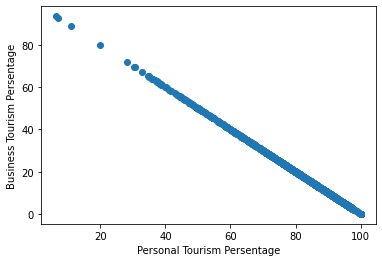

In [36]:
plt.scatter(data_df['Personal Percentage'], data_df['Business Percentage'])
plt.xlabel('Personal Tourism Persentage')
plt.ylabel('Business Tourism Persentage')
plt.show()

In [37]:
X = data_df['Business Percentage'].values.reshape(-1, 1)

In [38]:
model2.fit(X, y)

LinearRegression()

In [39]:
y_pred = model2.predict(X)
print(y_pred.shape)

(1269,)


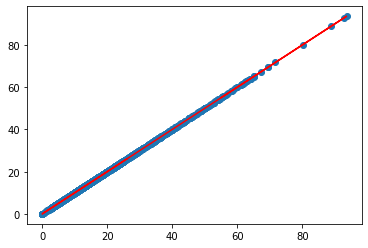

In [40]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.show()

In [41]:
print(model2.coef_)
print(model2.intercept_)

[1.]
0.0


In [42]:
from sklearn import tree
#Creating decision tree classifier
model3 = tree.DecisionTreeClassifier()
#Fit
model3.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [43]:
#Making predictions
predictions = model.predict(X_test_scaled)

In [44]:
predictions

array(['Business', 'Personal', 'Personal', 'Personal', 'Business',
       'Business', 'Business', 'Business', 'Business', 'Personal',
       'Business', 'Business', 'Personal', 'Business', 'Personal',
       'Business', 'Business', 'Business', 'Business', 'Business',
       'Business', 'Personal', 'Personal', 'Personal', 'Personal',
       'Business', 'Business', 'Business', 'Business', 'Business',
       'Personal', 'Personal', 'Personal', 'Business', 'Personal',
       'Business', 'Business', 'Personal', 'Personal', 'Personal',
       'Personal', 'Business', 'Personal', 'Personal', 'Personal',
       'Business', 'Business', 'Business', 'Business', 'Business',
       'Business', 'Business', 'Business', 'Personal', 'Business',
       'Business', 'Business', 'Personal', 'Personal', 'Business',
       'Business', 'Business', 'Business', 'Business', 'Business',
       'Personal', 'Business', 'Personal', 'Personal', 'Business',
       'Personal', 'Business', 'Business', 'Personal', 'Busine

In [45]:
#Confusion matrix
cm = confusion_matrix(y_test, predictions)

#Create a DataFrame from cm
cm_df = pd.DataFrame(cm, index=["Actual Business", "Actual Personal"], columns=["Predict Business", "Predict Personal"])
cm_df

,Predict Business,Predict Personal
Actual Business,163,3
Actual Personal,0,152


In [48]:
#Calculate accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.9905660377358491

In [51]:
#results
print("Conusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Conusion Matrix


,Predict Business,Predict Personal
Actual Business,163,3
Actual Personal,0,152


Accuracy Score : 0.9905660377358491
Classification Report
              precision    recall  f1-score   support

    Business       1.00      0.98      0.99       166
    Personal       0.98      1.00      0.99       152

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318

